<a href="https://colab.research.google.com/github/Ishita95-harvad/All-Nobel-Prize-winners-from-1901-2025/blob/main/All_Nobel_Prize_winners_from_1901_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# All Nobel Prize winners from 1901-2025
Nobel Prize winner since 1901 upto (2025-03-25)

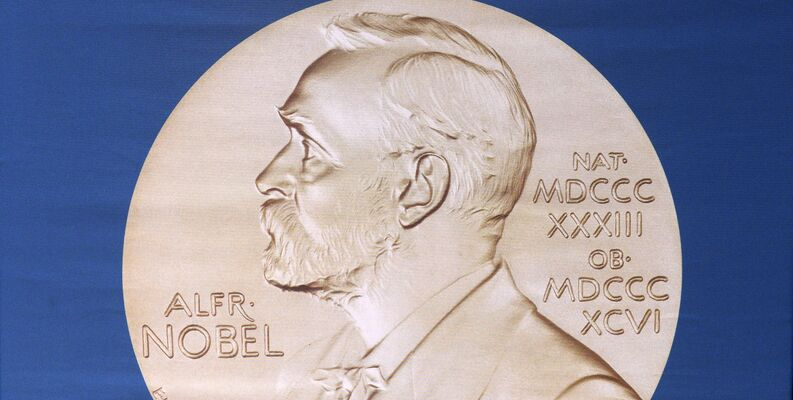




---



## Data loading

### Subtask:
Load the "nobel.csv" file into a pandas DataFrame.


**Reasoning**:
Load the "nobel.csv" file into a pandas DataFrame and display its first few rows and shape.



In [1]:
import pandas as pd

try:
    df_nobel = pd.read_csv('nobel.csv')
    display(df_nobel.head())
    print(df_nobel.shape)
except FileNotFoundError:
    print("Error: 'nobel.csv' not found. Please ensure the file exists in the current directory.")
    df_nobel = None # Assign None to indicate failure
except Exception as e:
    print(f"An error occurred: {e}")
    df_nobel = None

,awardYear,category,categoryFullName,sortOrder,portion,prizeAmount,prizeAmountAdjusted,dateAwarded,prizeStatus,motivation,...,org_founded_country,org_founded_countryNow,org_founded_locationString,ind_or_org,residence_1,residence_2,affiliation_1,affiliation_2,affiliation_3,affiliation_4
0,2001,Economic Sciences,The Sveriges Riksbank Prize in Economic Scienc...,2,1/3,10000000,12295082,2001-10-10,received,for their analyses of markets with asymmetric ...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Stanford University, Stanford, CA, USA",NaN,NaN,NaN
1,1975,Physics,The Nobel Prize in Physics,1,1/3,630000,3404179,1975-10-17,received,for the discovery of the connection between co...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Niels Bohr Institute, Copenhagen, Denmark",NaN,NaN,NaN
2,2004,Chemistry,The Nobel Prize in Chemistry,1,1/3,10000000,11762861,2004-10-06,received,for the discovery of ubiquitin-mediated protei...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Technion - Israel Institute of Technology, Hai...",NaN,NaN,NaN
3,1982,Chemistry,The Nobel Prize in Chemistry,1,1,1150000,3102518,1982-10-18,received,for his development of crystallographic electr...,...,NaN,NaN,NaN,Individual,NaN,NaN,"MRC Laboratory of Molecular Biology, Cambridge...",NaN,NaN,NaN
4,1979,Physics,The Nobel Prize in Physics,2,1/3,800000,2988048,1979-10-15,received,for their contributions to the theory of the u...,...,NaN,NaN,NaN,Individual,NaN,NaN,"International Centre for Theoretical Physics, ...","Imperial College, London, United Kingdom",NaN,NaN


(950, 52)


## Data exploration

### Subtask:
Explore the loaded Nobel Prize data to understand its structure, identify missing values, and analyze the distribution of key variables.


**Reasoning**:
Examine data types and summary statistics using .info() and .describe(), analyze key variable distributions using .value_counts() and histograms, identify missing values using .isnull().sum(), and create initial visualizations.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   awardYear                   950 non-null    int64 
 1   category                    950 non-null    object
 2   categoryFullName            950 non-null    object
 3   sortOrder                   950 non-null    int64 
 4   portion                     950 non-null    object
 5   prizeAmount                 950 non-null    int64 
 6   prizeAmountAdjusted         950 non-null    int64 
 7   dateAwarded                 533 non-null    object
 8   prizeStatus                 950 non-null    object
 9   motivation                  950 non-null    object
 10  categoryTopMotivation       20 non-null     object
 11  award_link                  950 non-null    object
 12  id                          950 non-null    int64 
 13  name                        950 non-null    object

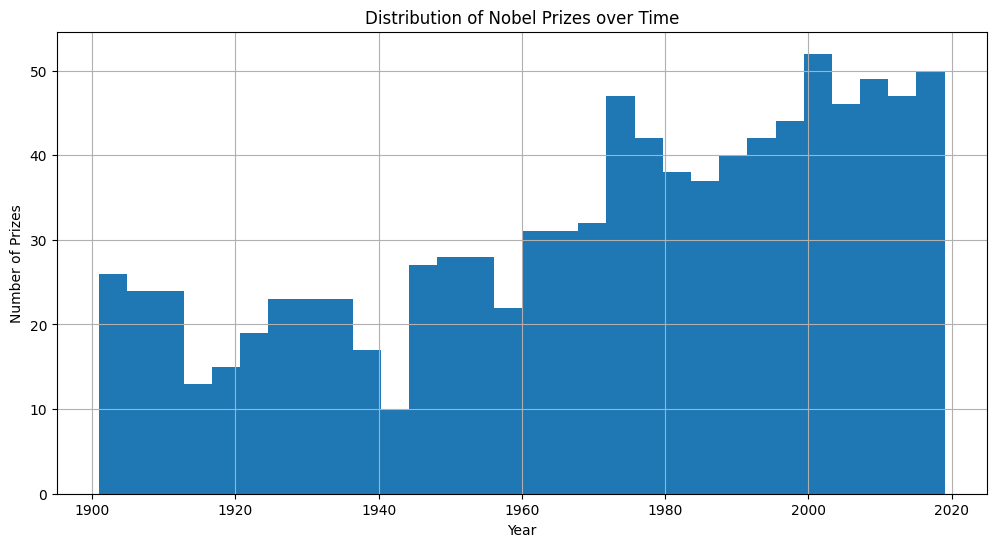

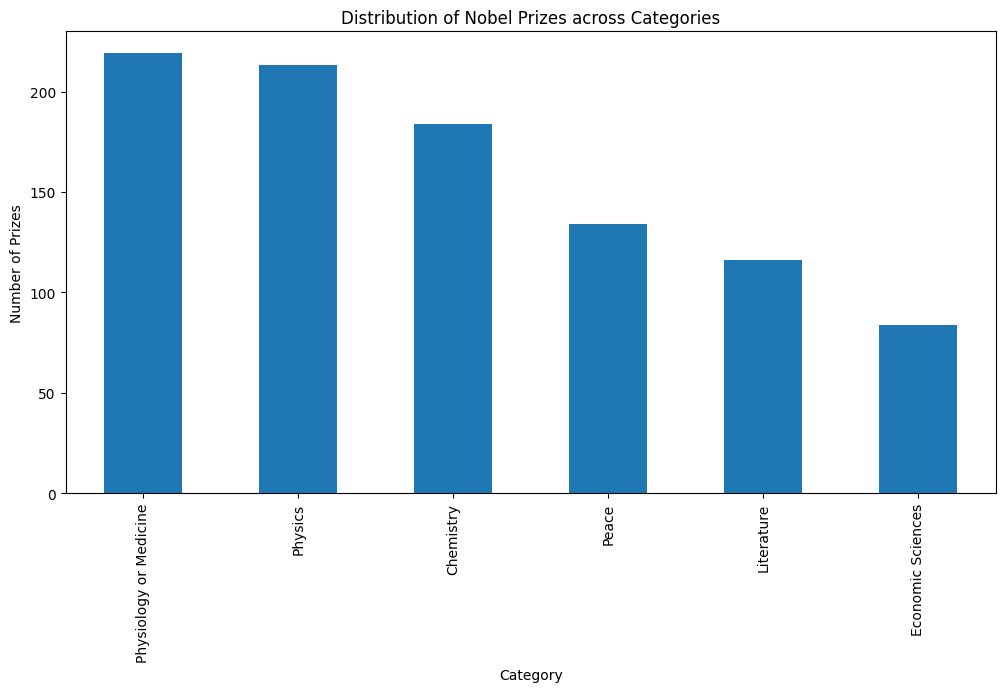

In [3]:
# Examine data types and summary statistics
print(df_nobel.info())
print(df_nobel.describe())

# Analyze key variable distributions
print(df_nobel['awardYear'].value_counts())
print(df_nobel['category'].value_counts())
print(df_nobel['birth_country'].value_counts())
print(df_nobel['category'].unique())

import matplotlib.pyplot as plt

# Identify missing values
print(df_nobel.isnull().sum())

# Initial data visualization
plt.figure(figsize=(12, 6))
df_nobel['awardYear'].hist(bins=30)
plt.xlabel('Year')
plt.ylabel('Number of Prizes')
plt.title('Distribution of Nobel Prizes over Time')
plt.show()

plt.figure(figsize=(12, 6))
df_nobel['category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Number of Prizes')
plt.title('Distribution of Nobel Prizes across Categories')
plt.show()

## Data cleaning

### Subtask:
Clean the Nobel Prize dataset by handling missing values and inconsistencies.


**Reasoning**:
I need to clean the dataframe by handling missing values and inconsistencies. I will fill missing values in specific columns with appropriate strategies and remove rows with inconsistencies. I will also convert data types when necessary.



In [4]:
# Fill missing values in 'birth_country' with 'Unknown'
df_nobel_cleaned = df_nobel.copy()
df_nobel_cleaned['birth_country'].fillna('Unknown', inplace=True)

# Fill missing values in 'death_country' with 'Unknown'
df_nobel_cleaned['death_country'].fillna('Unknown', inplace=True)

# Remove rows with missing 'dateAwarded'
df_nobel_cleaned.dropna(subset=['dateAwarded'], inplace=True)

# Convert 'dateAwarded' to datetime objects
df_nobel_cleaned['dateAwarded'] = pd.to_datetime(df_nobel_cleaned['dateAwarded'])

# Remove duplicate rows
df_nobel_cleaned.drop_duplicates(inplace=True)

display(df_nobel_cleaned.head())
print(df_nobel_cleaned.shape)
print(df_nobel_cleaned.info())

<ipython-input-4-d30fac100c38>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_nobel_cleaned['birth_country'].fillna('Unknown', inplace=True)
<ipython-input-4-d30fac100c38>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

,awardYear,category,categoryFullName,sortOrder,portion,prizeAmount,prizeAmountAdjusted,dateAwarded,prizeStatus,motivation,...,org_founded_country,org_founded_countryNow,org_founded_locationString,ind_or_org,residence_1,residence_2,affiliation_1,affiliation_2,affiliation_3,affiliation_4
0,2001,Economic Sciences,The Sveriges Riksbank Prize in Economic Scienc...,2,1/3,10000000,12295082,2001-10-10,received,for their analyses of markets with asymmetric ...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Stanford University, Stanford, CA, USA",NaN,NaN,NaN
1,1975,Physics,The Nobel Prize in Physics,1,1/3,630000,3404179,1975-10-17,received,for the discovery of the connection between co...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Niels Bohr Institute, Copenhagen, Denmark",NaN,NaN,NaN
2,2004,Chemistry,The Nobel Prize in Chemistry,1,1/3,10000000,11762861,2004-10-06,received,for the discovery of ubiquitin-mediated protei...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Technion - Israel Institute of Technology, Hai...",NaN,NaN,NaN
3,1982,Chemistry,The Nobel Prize in Chemistry,1,1,1150000,3102518,1982-10-18,received,for his development of crystallographic electr...,...,NaN,NaN,NaN,Individual,NaN,NaN,"MRC Laboratory of Molecular Biology, Cambridge...",NaN,NaN,NaN
4,1979,Physics,The Nobel Prize in Physics,2,1/3,800000,2988048,1979-10-15,received,for their contributions to the theory of the u...,...,NaN,NaN,NaN,Individual,NaN,NaN,"International Centre for Theoretical Physics, ...","Imperial College, London, United Kingdom",NaN,NaN


(533, 52)
<class 'pandas.core.frame.DataFrame'>
Index: 533 entries, 0 to 949
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   awardYear                   533 non-null    int64         
 1   category                    533 non-null    object        
 2   categoryFullName            533 non-null    object        
 3   sortOrder                   533 non-null    int64         
 4   portion                     533 non-null    object        
 5   prizeAmount                 533 non-null    int64         
 6   prizeAmountAdjusted         533 non-null    int64         
 7   dateAwarded                 533 non-null    datetime64[ns]
 8   prizeStatus                 533 non-null    object        
 9   motivation                  533 non-null    object        
 10  categoryTopMotivation       20 non-null     object        
 11  award_link                  533 non-null    object   

**Reasoning**:
The previous code block had chained assignment warnings. I will fix them and re-run the code.



In [5]:
# Fill missing values in 'birth_country' with 'Unknown'
df_nobel_cleaned = df_nobel.copy()
df_nobel_cleaned['birth_country'] = df_nobel_cleaned['birth_country'].fillna('Unknown')

# Fill missing values in 'death_country' with 'Unknown'
df_nobel_cleaned['death_country'] = df_nobel_cleaned['death_country'].fillna('Unknown')

# Remove rows with missing 'dateAwarded'
df_nobel_cleaned.dropna(subset=['dateAwarded'], inplace=True)

# Convert 'dateAwarded' to datetime objects
df_nobel_cleaned['dateAwarded'] = pd.to_datetime(df_nobel_cleaned['dateAwarded'])

# Remove duplicate rows
df_nobel_cleaned.drop_duplicates(inplace=True)

display(df_nobel_cleaned.head())
print(df_nobel_cleaned.shape)
print(df_nobel_cleaned.info())

,awardYear,category,categoryFullName,sortOrder,portion,prizeAmount,prizeAmountAdjusted,dateAwarded,prizeStatus,motivation,...,org_founded_country,org_founded_countryNow,org_founded_locationString,ind_or_org,residence_1,residence_2,affiliation_1,affiliation_2,affiliation_3,affiliation_4
0,2001,Economic Sciences,The Sveriges Riksbank Prize in Economic Scienc...,2,1/3,10000000,12295082,2001-10-10,received,for their analyses of markets with asymmetric ...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Stanford University, Stanford, CA, USA",NaN,NaN,NaN
1,1975,Physics,The Nobel Prize in Physics,1,1/3,630000,3404179,1975-10-17,received,for the discovery of the connection between co...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Niels Bohr Institute, Copenhagen, Denmark",NaN,NaN,NaN
2,2004,Chemistry,The Nobel Prize in Chemistry,1,1/3,10000000,11762861,2004-10-06,received,for the discovery of ubiquitin-mediated protei...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Technion - Israel Institute of Technology, Hai...",NaN,NaN,NaN
3,1982,Chemistry,The Nobel Prize in Chemistry,1,1,1150000,3102518,1982-10-18,received,for his development of crystallographic electr...,...,NaN,NaN,NaN,Individual,NaN,NaN,"MRC Laboratory of Molecular Biology, Cambridge...",NaN,NaN,NaN
4,1979,Physics,The Nobel Prize in Physics,2,1/3,800000,2988048,1979-10-15,received,for their contributions to the theory of the u...,...,NaN,NaN,NaN,Individual,NaN,NaN,"International Centre for Theoretical Physics, ...","Imperial College, London, United Kingdom",NaN,NaN


(533, 52)
<class 'pandas.core.frame.DataFrame'>
Index: 533 entries, 0 to 949
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   awardYear                   533 non-null    int64         
 1   category                    533 non-null    object        
 2   categoryFullName            533 non-null    object        
 3   sortOrder                   533 non-null    int64         
 4   portion                     533 non-null    object        
 5   prizeAmount                 533 non-null    int64         
 6   prizeAmountAdjusted         533 non-null    int64         
 7   dateAwarded                 533 non-null    datetime64[ns]
 8   prizeStatus                 533 non-null    object        
 9   motivation                  533 non-null    object        
 10  categoryTopMotivation       20 non-null     object        
 11  award_link                  533 non-null    object   

## Data analysis

### Subtask:
Analyze the cleaned Nobel Prize data to answer specific questions.


**Reasoning**:
Analyze the trends in Nobel Prizes over time, identify top awarding countries, analyze category trends, analyze laureate age distribution, and explore combined analysis.



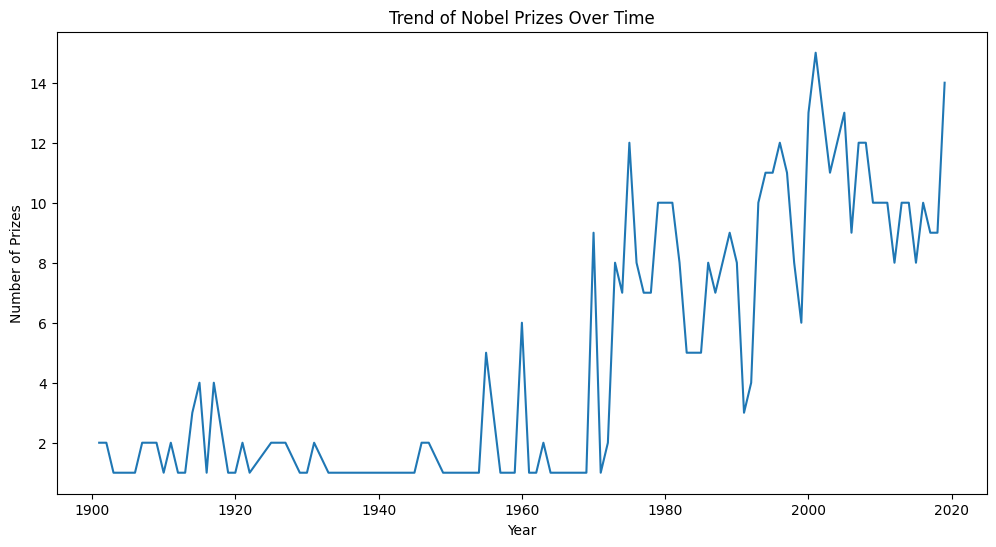

Top 10 Awarding Countries:
 birth_country
USA               181
United Kingdom     44
Germany            30
Unknown            27
France             25
Japan              18
Sweden             18
Canada             15
Switzerland        10
Russia              8
Name: count, dtype: int64


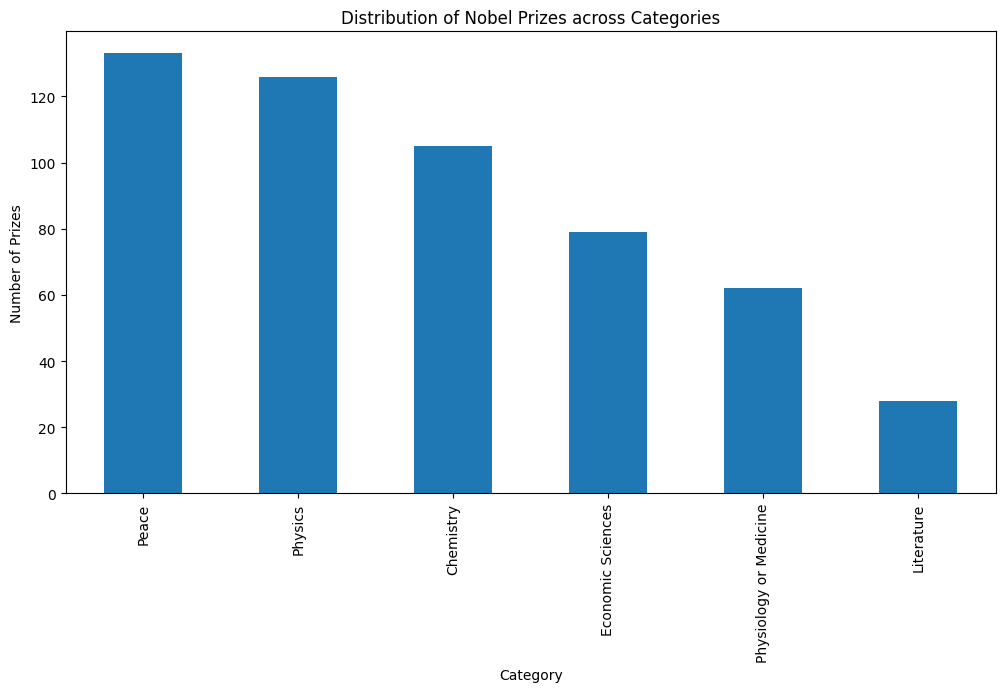

count        501.0
mean     62.616766
std      12.231306
min           17.0
25%           54.0
50%           63.0
75%           71.0
max           97.0
Name: age_at_award, dtype: Float64


<ipython-input-6-b82cebc97c77>:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_nobel_cleaned['birth_date'] = pd.to_datetime(df_nobel_cleaned['birth_date'], errors='coerce')


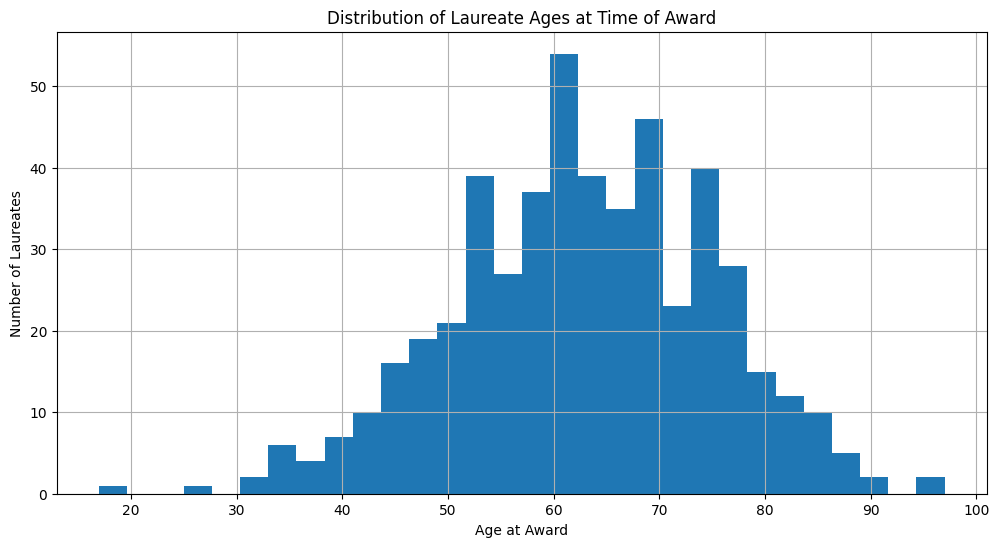

Top 10 countries in each category: 
 category                      Chemistry  Economic Sciences  Literature  Peace  \
birth_country                                                                   
Argentina                             0                  0           0      2   
Australia                             1                  0           0      0   
Austria                               2                  1           2      1   
Austria-Hungary                       1                  0           0      0   
Austrian Empire                       0                  0           0      2   
Belgian Congo                         0                  0           0      1   
Belgium                               1                  0           0      3   
Brazil                                0                  0           0      0   
British India                         0                  0           0      1   
British Mandate of Palestine          3                  1           0  

In [6]:
import matplotlib.pyplot as plt

# 1. Trends in Nobel Prizes over Time
prizes_per_year = df_nobel_cleaned['awardYear'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(prizes_per_year.index, prizes_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Prizes')
plt.title('Trend of Nobel Prizes Over Time')
plt.show()

# 2. Top Awarding Countries
top_countries = df_nobel_cleaned['birth_country'].value_counts().head(10)
print("Top 10 Awarding Countries:\n", top_countries)

# 3. Category Trends
category_trends = df_nobel_cleaned['category'].value_counts()
plt.figure(figsize=(12, 6))
category_trends.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Number of Prizes')
plt.title('Distribution of Nobel Prizes across Categories')
plt.show()

# 4. Laureate Age Distribution
df_nobel_cleaned['birth_date'] = pd.to_datetime(df_nobel_cleaned['birth_date'], errors='coerce')
df_nobel_cleaned['awardYear'] = pd.to_numeric(df_nobel_cleaned['awardYear'], errors='coerce')
df_nobel_cleaned['age_at_award'] = df_nobel_cleaned['awardYear'] - df_nobel_cleaned['birth_date'].dt.year
df_nobel_cleaned['age_at_award'] = df_nobel_cleaned['age_at_award'].astype('Int64')
print(df_nobel_cleaned['age_at_award'].describe())

plt.figure(figsize=(12, 6))
df_nobel_cleaned['age_at_award'].hist(bins=30)
plt.xlabel('Age at Award')
plt.ylabel('Number of Laureates')
plt.title('Distribution of Laureate Ages at Time of Award')
plt.show()


# 5. Combined Analysis (Optional but Recommended)
country_category = df_nobel_cleaned.groupby(['birth_country', 'category']).size().unstack(fill_value=0)
print("Top 10 countries in each category: \n", country_category.head(10))


## Data visualization

### Subtask:
Visualize the key findings from the data analysis. Create visualizations such as line plots, bar charts, and histograms to represent the trends and distributions identified in the previous step.


**Reasoning**:
Create the visualizations specified in the instructions using the cleaned dataframe.



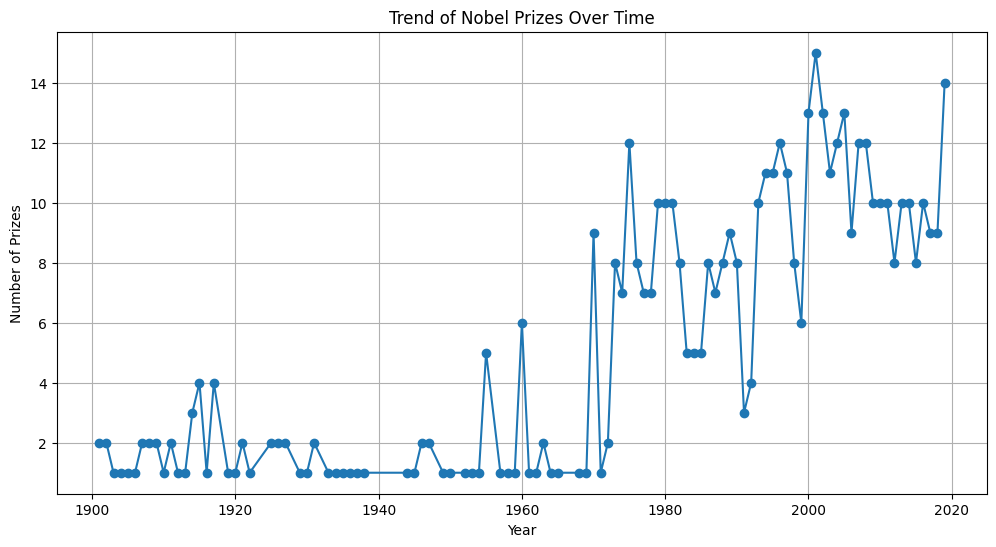

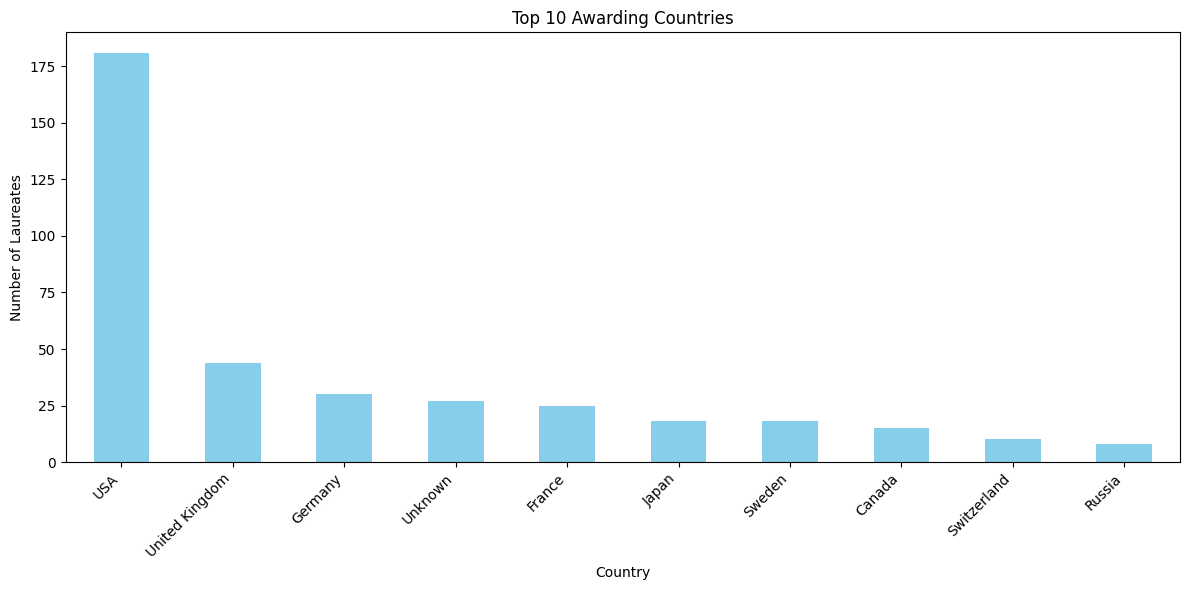

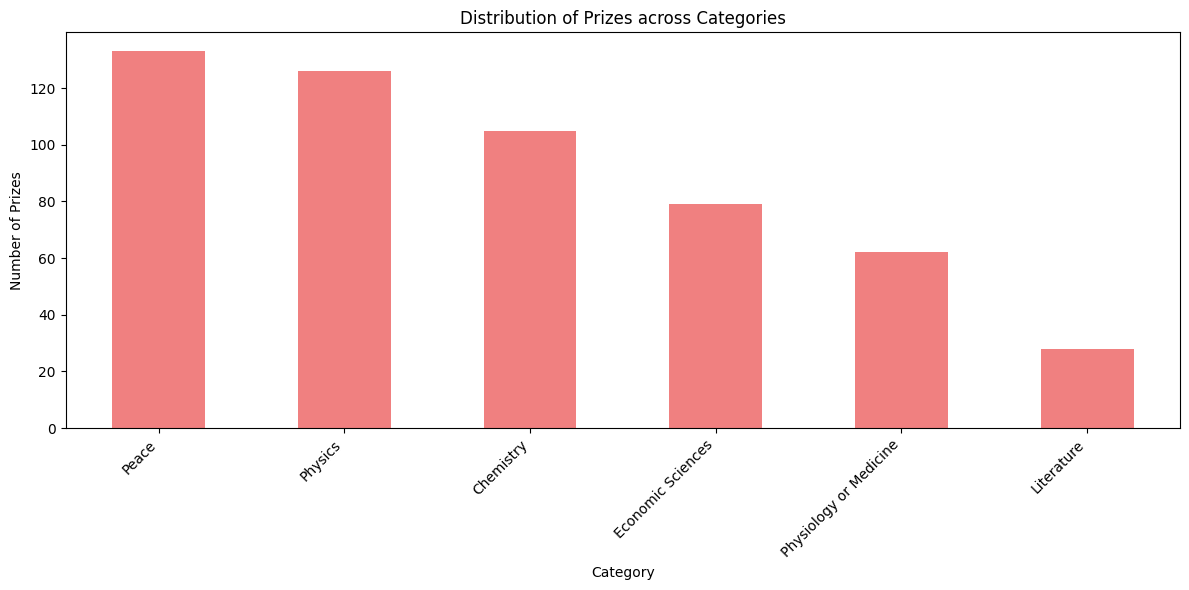

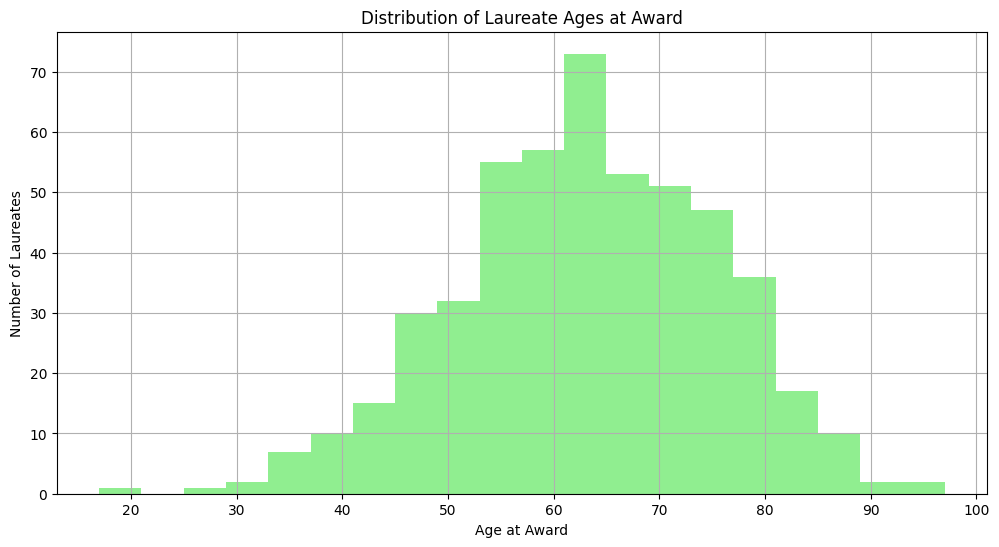

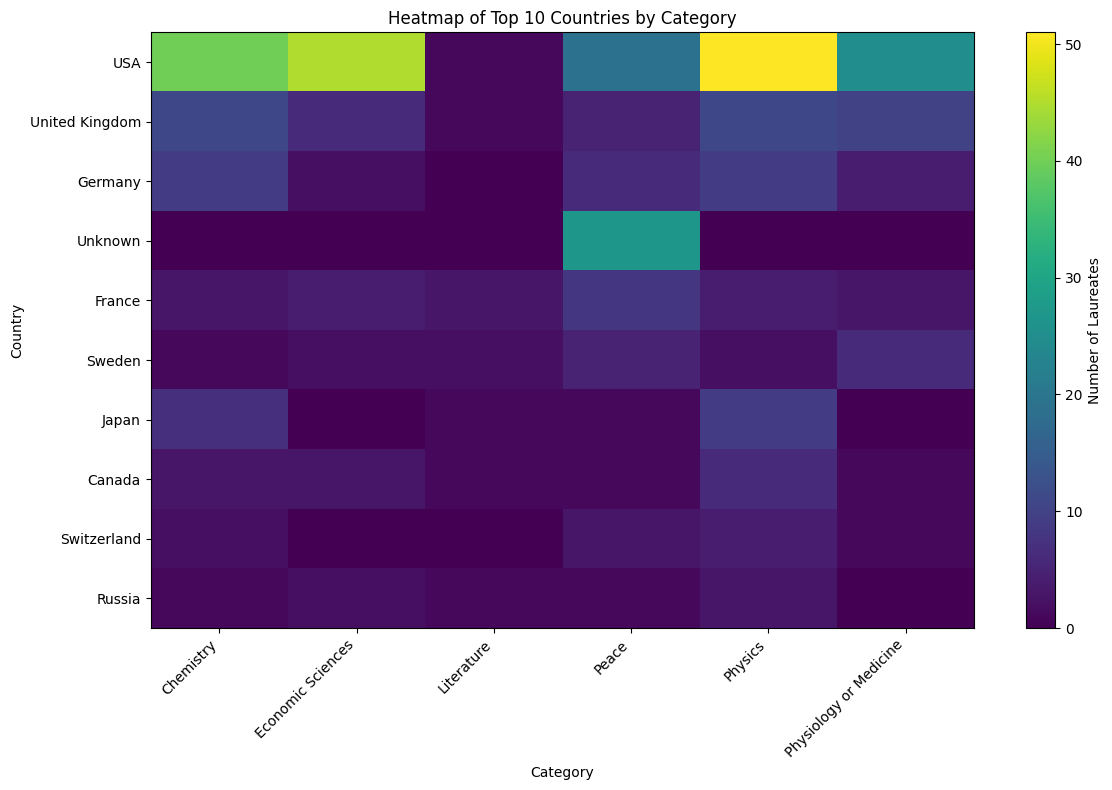

In [7]:
import matplotlib.pyplot as plt

# 1. Trend of Nobel Prizes Over Time
prizes_per_year = df_nobel_cleaned['awardYear'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(prizes_per_year.index, prizes_per_year.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Number of Prizes')
plt.title('Trend of Nobel Prizes Over Time')
plt.grid(True)
plt.show()

# 2. Top Awarding Countries
top_countries = df_nobel_cleaned['birth_country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Number of Laureates')
plt.title('Top 10 Awarding Countries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Distribution of Prizes across Categories
category_counts = df_nobel_cleaned['category'].value_counts()
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar', color='lightcoral')
plt.xlabel('Category')
plt.ylabel('Number of Prizes')
plt.title('Distribution of Prizes across Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Distribution of Laureate Ages at Award
plt.figure(figsize=(12, 6))
df_nobel_cleaned['age_at_award'].hist(bins=20, color='lightgreen')
plt.xlabel('Age at Award')
plt.ylabel('Number of Laureates')
plt.title('Distribution of Laureate Ages at Award')
plt.show()

# 5. Combined Analysis (Optional):  Heatmap of Top Countries per Category
country_category_counts = df_nobel_cleaned.groupby(['birth_country', 'category']).size().unstack(fill_value=0)
top_10_countries = country_category_counts.sum(axis=1).sort_values(ascending=False).head(10).index
top_countries_heatmap = country_category_counts.loc[top_10_countries]

plt.figure(figsize=(12, 8))
plt.imshow(top_countries_heatmap, cmap='viridis', aspect='auto')
plt.colorbar(label='Number of Laureates')
plt.xticks(range(len(top_countries_heatmap.columns)), top_countries_heatmap.columns, rotation=45, ha='right')
plt.yticks(range(len(top_countries_heatmap.index)), top_countries_heatmap.index)
plt.xlabel('Category')
plt.ylabel('Country')
plt.title('Heatmap of Top 10 Countries by Category')
plt.tight_layout()
plt.show()